# Non-Competitive Inhibition Global Fitting

### This ipython notebook code fits enzymatic data for a non-competitive mechanism. The fits use global fitting to extract Vmax, Km and Ki. The fits are reported with standard deviation for each parameter, R2, and sum of squares for the model fit. The parameters also have a 95% confidence interval reported by using a Student's T-Test.

In [5]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import t
import seaborn as sns
import matplotlib.pyplot as plt

p0: [22.71162858984234 [20.77489948304114  24.648357696643544]
p1: [18.481964313205307 [18.179025105274796  18.784903521135817]
p2: [3.241210225163786 [3.1267302361937235  3.3556902141338485]


Km is: 22.7 +/- 0.9
Vmax is: 18.5 +/- 0.1
Ki is: 3.2 +/- 0.1
R^2 is: 0.99829
Sum Squares is: 1.47


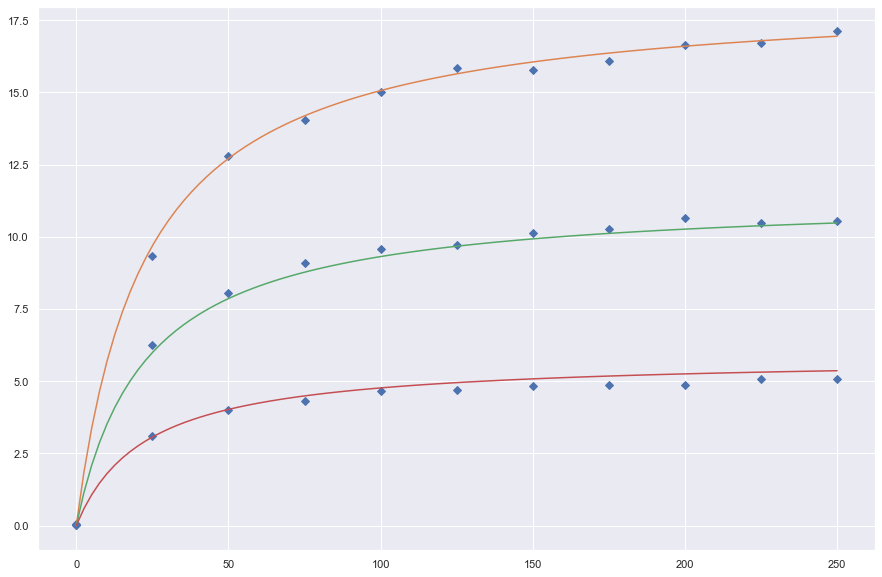

In [4]:
#substrate concentration
x_1 = np.array([0,25,50,75,100,125,150,175,200,225,250])

#np.hstack combines all the arrays into a single one
comboX = np.hstack((x_1, x_1, x_1))

y_1 = np.array([0.04, 9.33, 12.81, 14.06, 15.02, 15.86, 15.76, 16.08, 16.65, 16.7, 17.11])
y_2 = np.array([0.01, 6.25, 8.07, 9.08, 9.57, 9.72, 10.14, 10.27, 10.65, 10.49, 10.56])
y_3 = np.array([0.03, 3.1, 4.01, 4.3, 4.66, 4.7, 4.82, 4.86, 4.88, 5.06, 5.09])

# np.hstack combines all the arrays into a single one
comboY = np.hstack((y_1, y_2, y_3))

#Inhibitor Concentrations
I1 = np.array([0])
I2 = np.array([2])
I3 = np.array([7])

if len(y_1) != len(x_1):
    raise(Exception('Unequal x1 and y1 data length'))
if len(y_2) != len(x_1):
    raise(Exception('Unequal x2 and y2 data length'))
if len(y_3) != len(x_1):
    raise(Exception('Unequal x3 and y3 data length'))  
    
def function(x, Km, Vmax, Ki, I): # Equation to fit non-competitive inhibition
    return (Vmax/(1+(I/Ki))* x / (Km + x))

def combinedFunction(comboData, Km, Vmax, Ki):
    result1 = function(x_1, Km, Vmax, Ki, I1)
    result2 = function(x_1, Km, Vmax, Ki, I2)
    result3 = function(x_1, Km, Vmax, Ki, I3)
    return (np.hstack((result1, result2, result3)))

# some initial parameter values Km, Vmax, Ki
initialParameters = np.array([15, 20, 5])

# # curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(combinedFunction, comboX, comboY, initialParameters)

residuals = comboY - combinedFunction(comboX, fittedParameters[0],fittedParameters[1],fittedParameters[2])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((comboY-np.mean(comboY))**2)
r_squared = 1 - (ss_res/ss_tot)
alpha = 0.05 # 95% confidence interval = 100*(1-alpha)
n = len(comboY)    # number of data points
p = len(initialParameters) # number of parameters
dof = max(0, n - p) # number of degrees of freedom
# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 
for i, p,var in zip(range(n),fittedParameters, np.diag(pcov)):
    sigma = var**0.5
    print ('p{0}: [{1} [{2}  {3}]'.format(i, p, p - sigma*tval, p + sigma*tval))    
print ("")
print ("")
print ("Km is:", round(fittedParameters[0],1), "+/-", round(np.sqrt(pcov[0,0]),1))
print ("Vmax is:", round(fittedParameters[1],1),"+/-", round(np.sqrt(pcov[1,1]),1))
print ("Ki is:", round(fittedParameters[2],1),"+/-", round(np.sqrt(pcov[1,1]),1))
print ("R^2 is:", round(r_squared,5))
print ("Sum Squares is:", round(ss_res,2))

#values for display of fitted function
Km, Vmax, Ki = fittedParameters

xfit = np.linspace(0,250, 100)
xfit2 = np.linspace(0,250, 100)
xfit3 = np.linspace(0,250, 100)

y_fit_1 = function(xfit,fittedParameters[0],fittedParameters[1],fittedParameters[2], I1) # first data set, 
y_fit_2 = function(xfit,fittedParameters[0],fittedParameters[1],fittedParameters[2], I2) # second data set,
y_fit_3 = function(xfit,fittedParameters[0],fittedParameters[1], fittedParameters[2], I3) #third data set, 

sns.set()
plt.figure(figsize=(15,10))
plt.plot(comboX, comboY, 'D') # plot the raw data
plt.plot(xfit, y_fit_1) # plot the equation using the fitted parameters
plt.plot(xfit, y_fit_2) # plot the equation using the fitted parameters
plt.plot(xfit, y_fit_3) # plot the equation using the fitted parameters
plt.show()

# p0 = Km with 95% confidence interval reported
# p1 = Vmax with 95% confidence interval reported
# p2 = Ki with 95% confidence interval reported